#### Importing Libraries

In [2]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions 

In [2]:
file_path = r"C:\Users\khans\OneDrive\Desktop\AWS Project\data\train.csv"

In [3]:
train = pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,21/03/2019,Bangalore,New Delhi,BLR → BOM → DEL,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,27/03/2019,Delhi,Cochi,DEL → BOM → COK,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,09/03/2019,Bangalore,New Delhi,BLR → DEL,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,12/03/2019,Bangalore,New Delhi,BLR → BOM → DEL,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [4]:
train["date_of_journey"]

0       21/03/2019
1       27/03/2019
2       09/03/2019
3       12/06/2019
4       12/03/2019
           ...    
6690    21/03/2019
6691     1/05/2019
6692     1/06/2019
6693    24/06/2019
6694    01/03/2019
Name: date_of_journey, Length: 6695, dtype: object

In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
route               object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train = train.assign(
    **{
        col : pd.to_datetime(train.loc[:,col], dayfirst = True, errors = "raise") for col in ["date_of_journey", "dep_time", "arrival_time"]
    }
)
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
route                      object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   route            6694 non-null   object        
 5   dep_time         6695 non-null   datetime64[ns]
 6   arrival_time     6695 non-null   datetime64[ns]
 7   duration         6695 non-null   int64         
 8   total_stops      6694 non-null   float64       
 9   additional_info  6695 non-null   object        
 10  price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 575.5+ KB


In [8]:
train.loc[train["total_stops"].isna()]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
2534,Air India,2019-05-06,Delhi,Cochi,NaN,2025-09-08 09:45:00,2025-09-08 09:25:00,1420,NaN,No Info,7480


In [9]:
train.describe(include="object")

,airline,source,destination,route,additional_info
count,6695,6695,6695,6694,6695
unique,9,5,6,122,7
top,Jet Airways,Delhi,Cochi,DEL → BOM → COK,No Info
freq,2391,2730,2730,1477,5249


In [10]:
train.describe()

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


-Average duration is 633 and 75% duration are less than 923hrs but max is 2860 hrs 
duration column needs investigation as there are too much extreme values

In [11]:
train.total_stops.isna().any()

True

In [13]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
route,1,0.014937
total_stops,1,0.014937


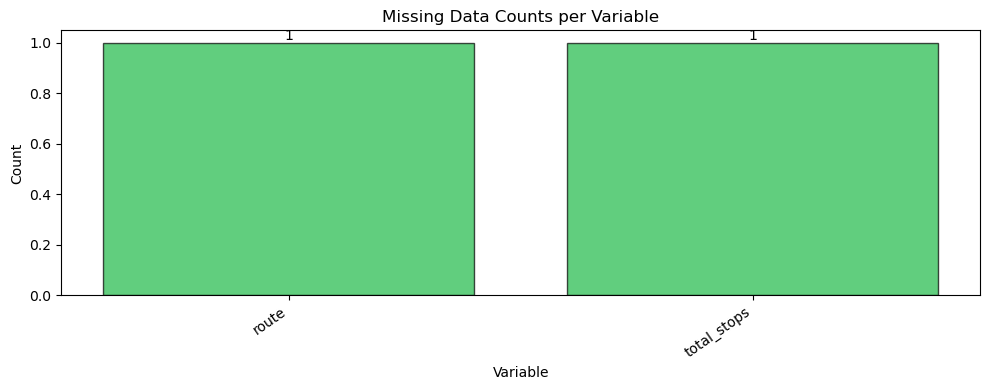

In [16]:
helper.plot_missing_info(train)

#### High Level Analysis of outliers

In [14]:
from sklearn.ensemble import IsolationForest
forest = IsolationForest(n_estimators=100, random_state=42)

In [15]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Bangalore,Delhi,BLR → DEL,2025-09-08 18:55:00,2025-09-08 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,BOM → HYD,2025-09-08 05:45:00,2025-09-08 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochi,DEL → AMD → BOM → COK,2025-09-08 23:05:00,2025-09-08 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,CCU → BOM → BLR,2025-09-08 14:05:00,2025-09-08 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochi,DEL → IDR → BOM → COK,2025-09-08 21:25:00,2025-09-08 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,CCU → IXR → DEL → BLR,2025-09-08 05:50:00,2025-09-08 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochi,DEL → IDR → BOM → COK,2025-09-08 21:25:00,2025-09-08 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,BOM → HYD,2025-09-08 09:10:00,2025-09-08 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochi,DEL → BDQ → BOM → COK,2025-09-08 10:45:00,2025-09-08 18:50:00,1925,2.0,No Info,11093,-1


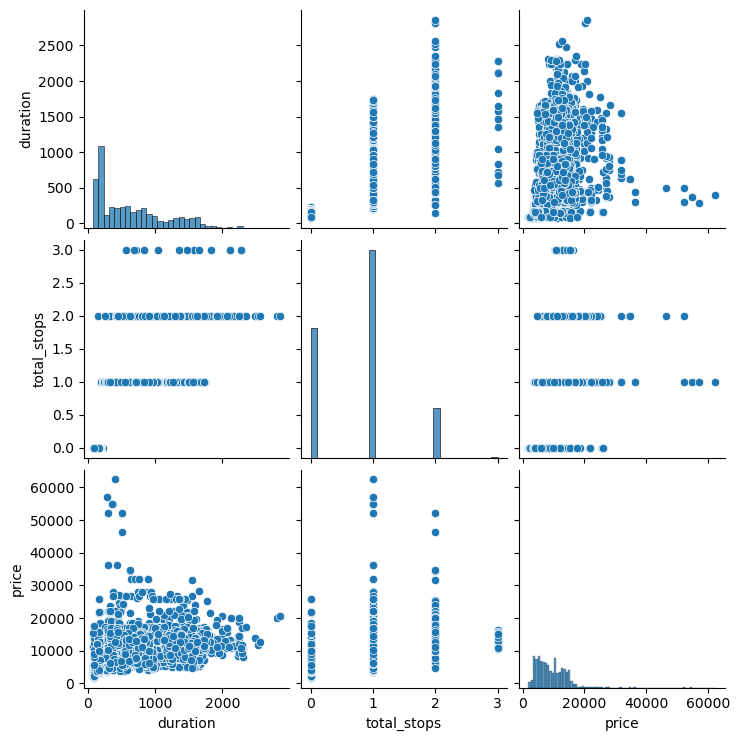

In [16]:
sns.pairplot(data=train)

#### Observations
- There is some correlation between Positive (Duration and price)
- Prices increases as Total Stops Increases
- Duration increase as Total Stop increases

C:\Users\khans\AppData\Local\Temp\ipykernel_23576\3799423604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


<Axes: >

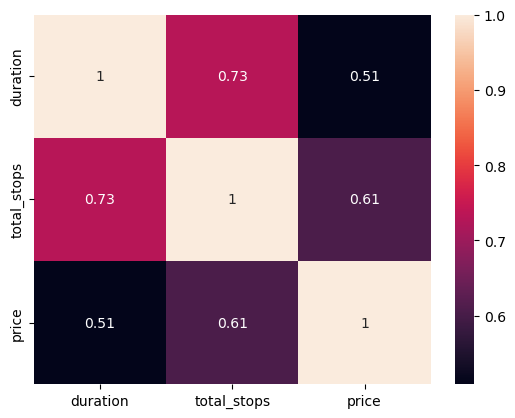

In [17]:
correlation_matrix = train.corr()
sns.heatmap(data = correlation_matrix, annot = True)

- We can see the correlation between Price and Duration 
- There is a correlation between duration and total steps
- There is a correlation between Total Stops and Price

#### Above Heatmap shows only the correlation between The Numerical features

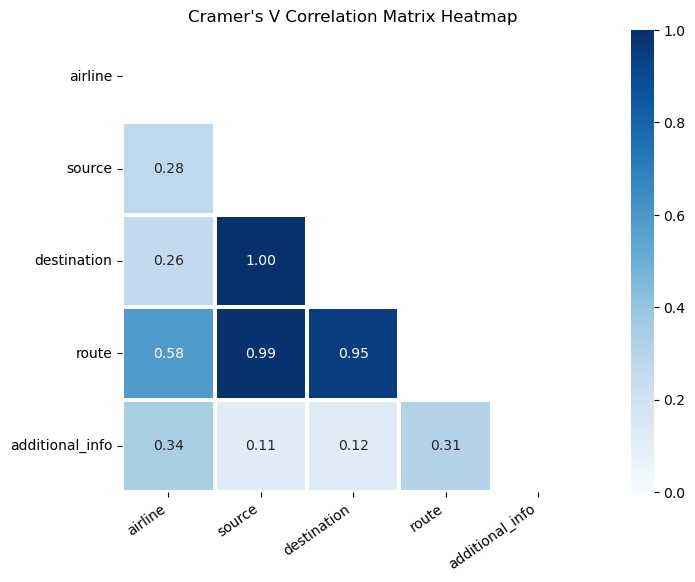

In [18]:
eda_helper_functions.cramersV_heatmap(train)

 ## Detailed Analysis

### 1.) Airline

In [19]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357132
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,736,0.109933
Spicejet,537,0.080209
Vistara,322,0.048096
Air Asia,211,0.031516
Goair,125,0.018671
Trujet,1,0.000149


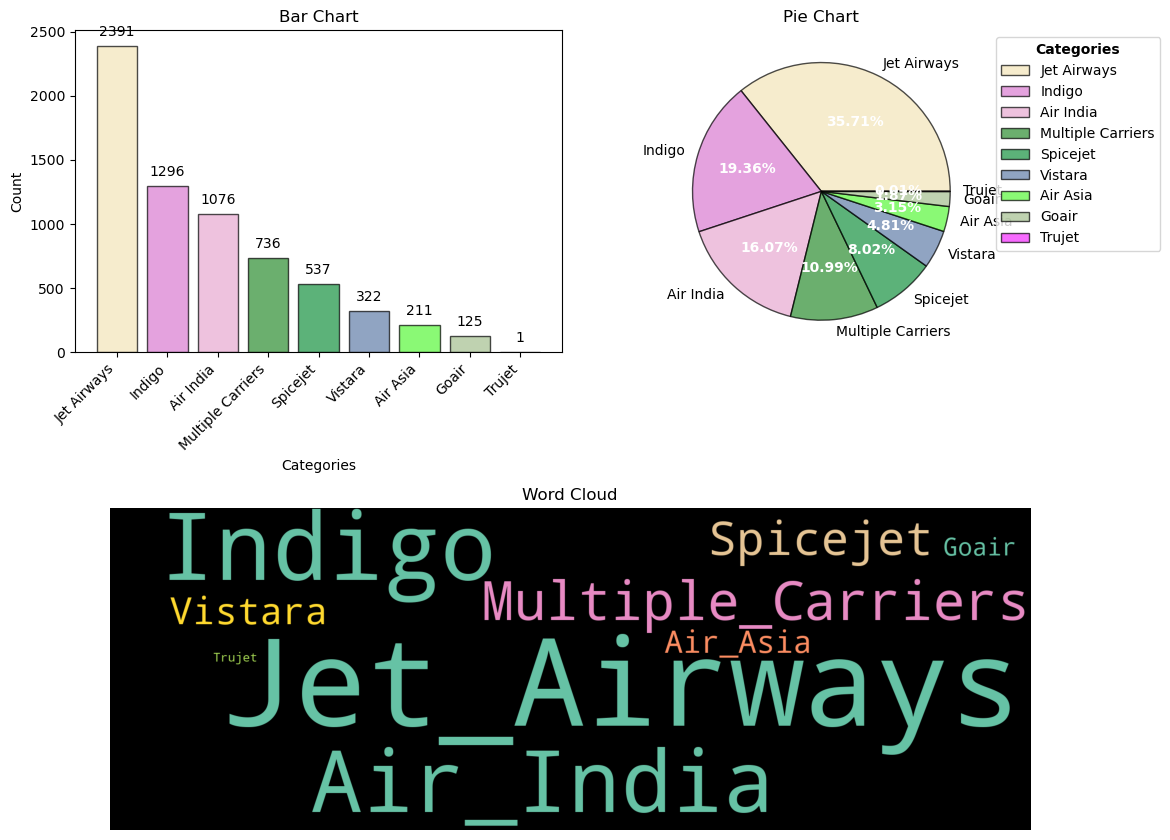

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline")

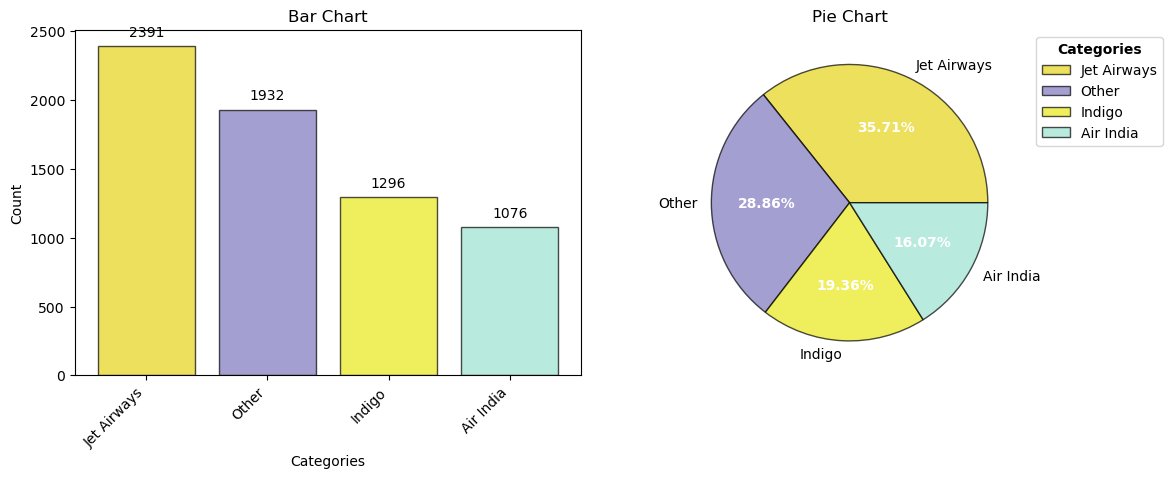

In [21]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)


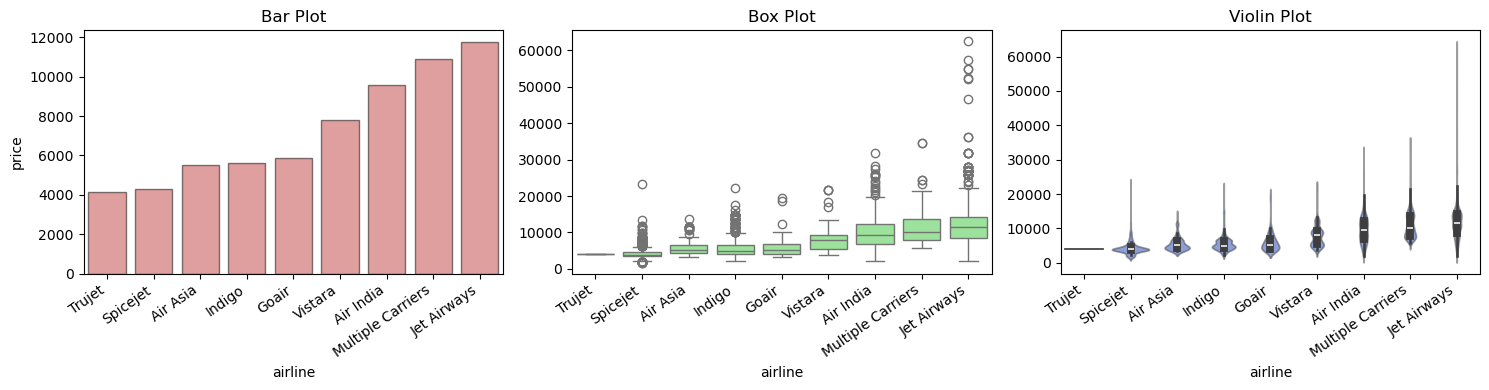

In [22]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [25]:

for group,data in train.groupby("airline"):
    print(group)
    print(type(group))
    print(type(data))
    break

Air Asia
<class 'str'>
<class 'pandas.core.frame.DataFrame'>


In [55]:
train.airline.nunique()

9

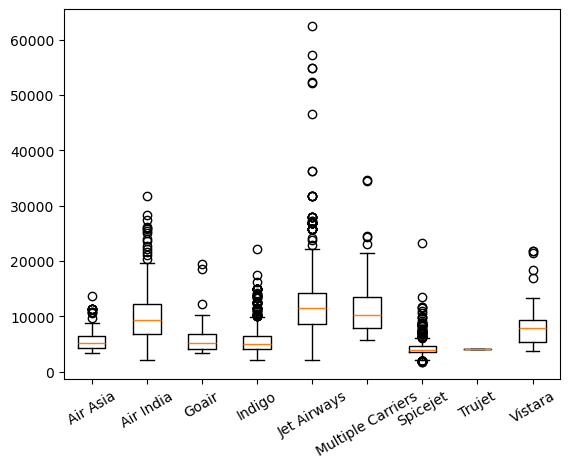

In [60]:
data_to_plot = [data.price for group, data in train.groupby("airline")]
labels = [group for group, data in train.groupby("airline")]

fig, ax = plt.subplots()
ax.boxplot(data_to_plot, labels=labels)
plt.xticks(rotation=30)
plt.show()

In [61]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.280702706463
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3131.4120748217883
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


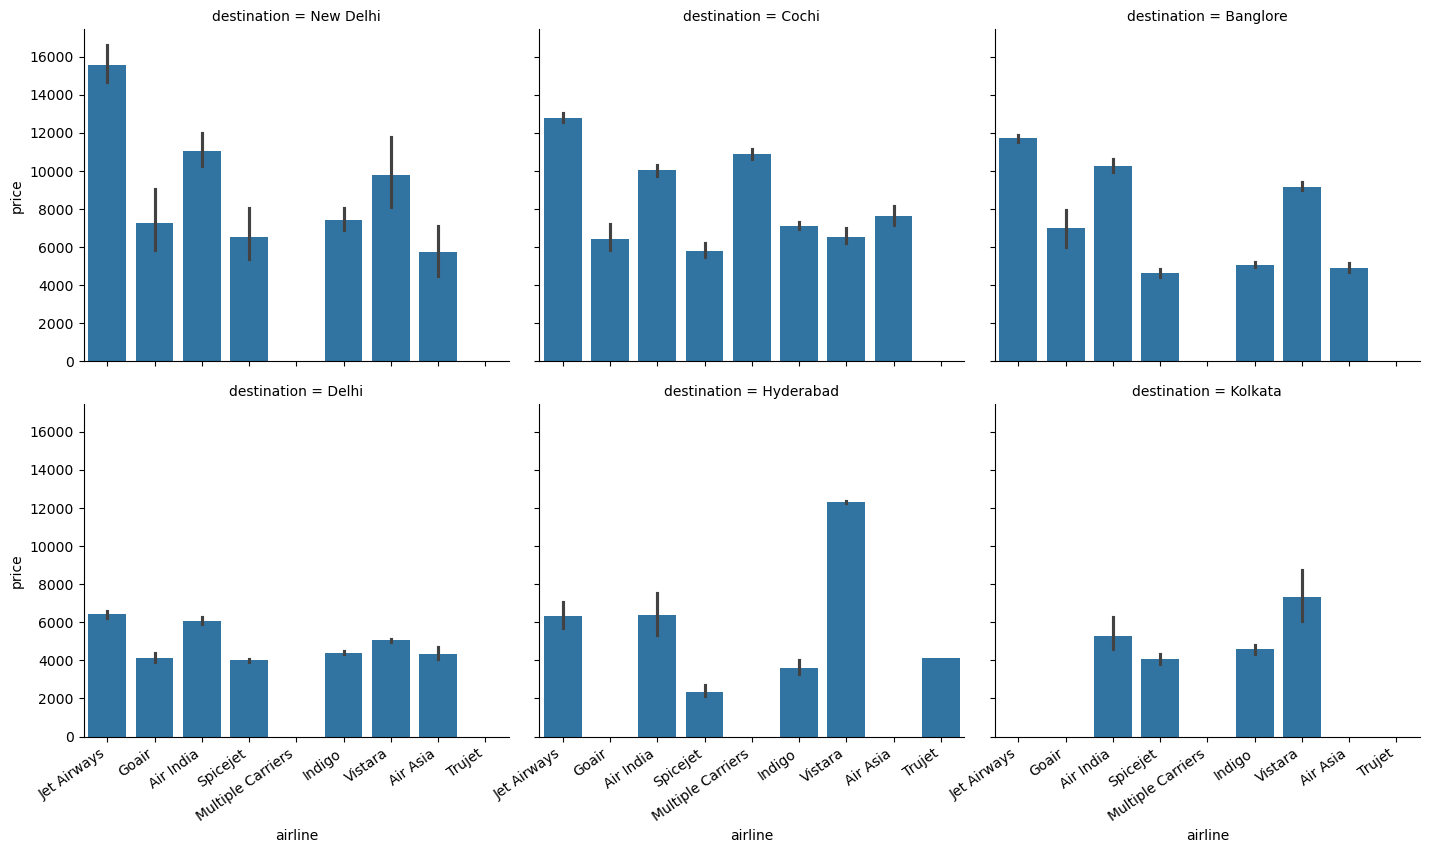

In [62]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

In [63]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

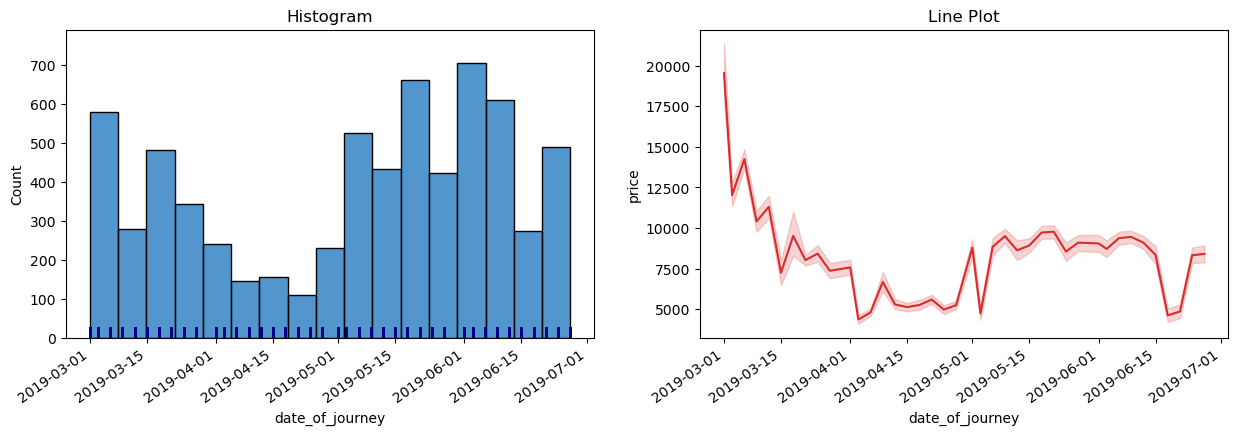

In [64]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

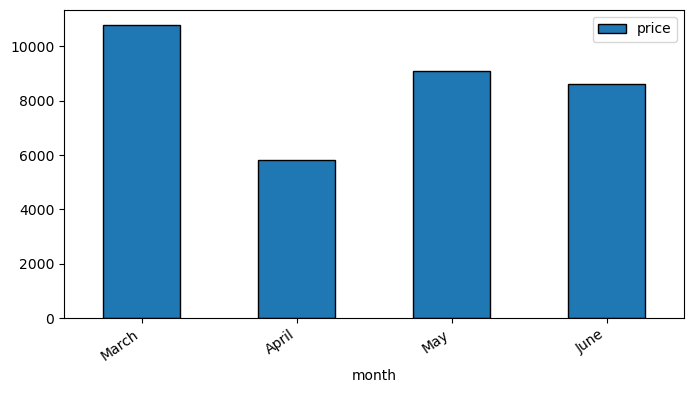

In [65]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

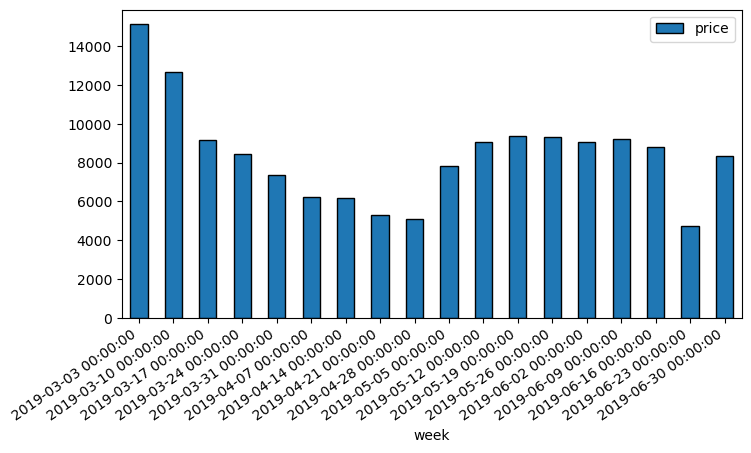

In [66]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

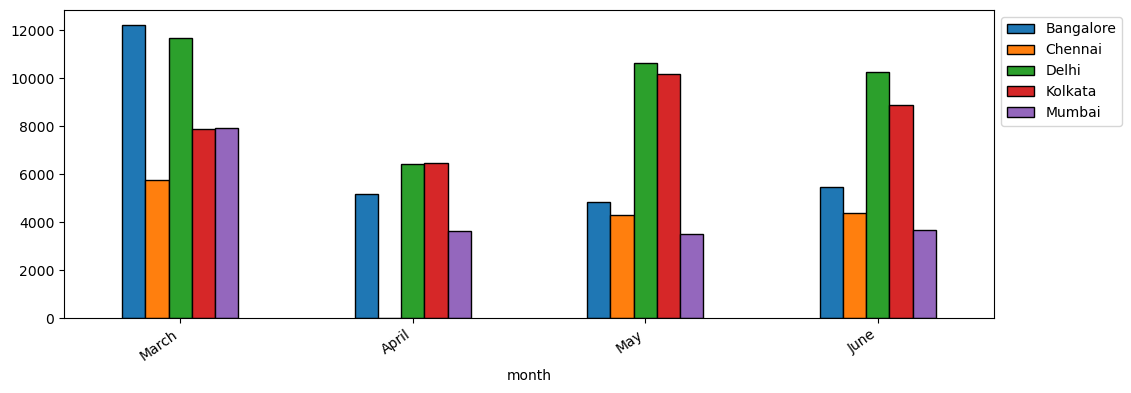

In [67]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### dep_time

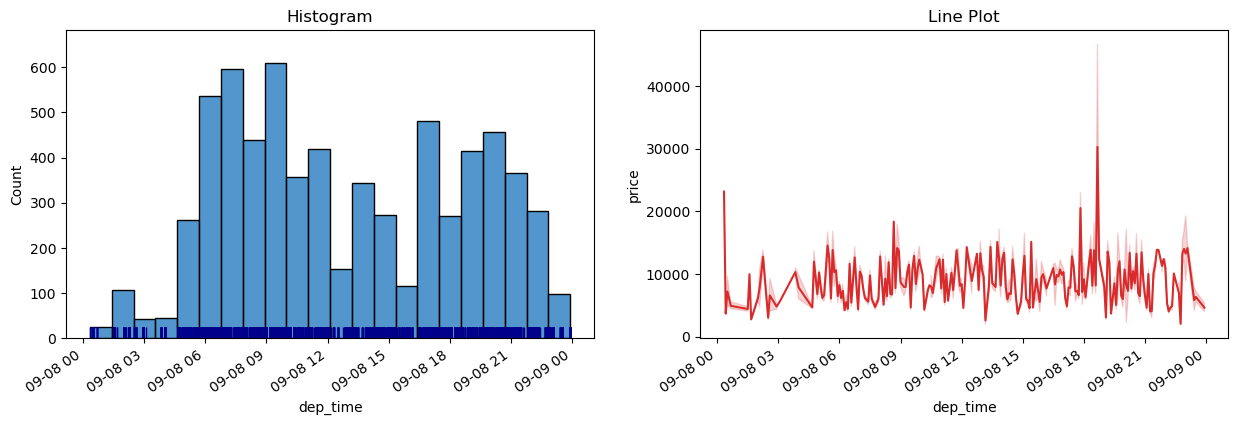

In [68]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

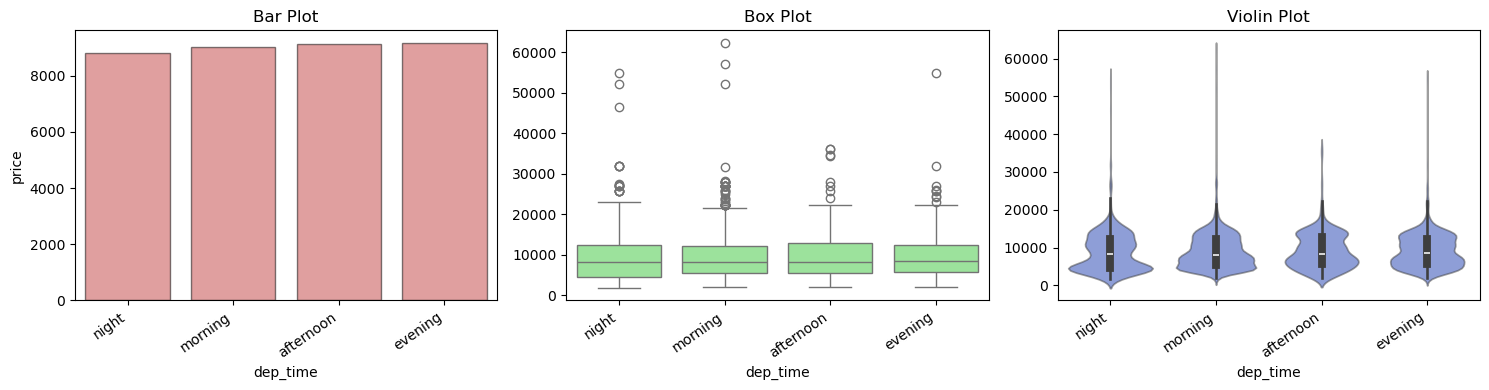

In [69]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

#### arrival_time

In [70]:
train.arrival_time

0      2025-09-08 19:10:00
1      2025-09-08 04:25:00
2      2025-09-08 14:35:00
3      2025-09-08 18:30:00
4      2025-09-08 07:40:00
               ...        
6690   2025-09-08 18:50:00
6691   2025-09-08 18:30:00
6692   2025-09-08 19:00:00
6693   2025-09-08 13:25:00
6694   2025-09-08 08:55:00
Name: arrival_time, Length: 6695, dtype: datetime64[ns]

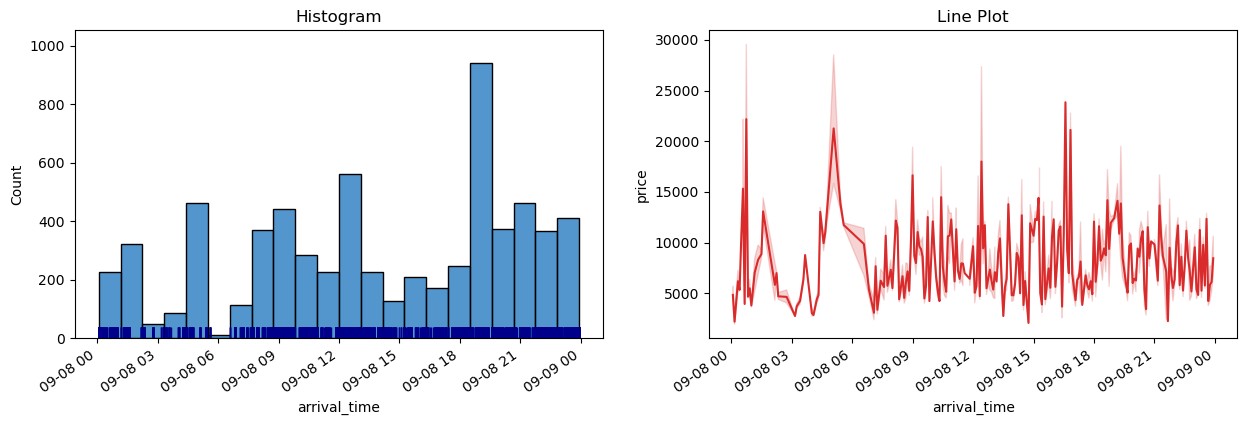

In [71]:
eda_helper_functions.dt_univar_plots(train, "arrival_time", "price")

In [72]:
train.arrival_time.dt.hour.between(4,12, inclusive = "left")

0       False
1        True
2       False
3       False
4        True
        ...  
6690    False
6691    False
6692    False
6693    False
6694     True
Name: arrival_time, Length: 6695, dtype: bool

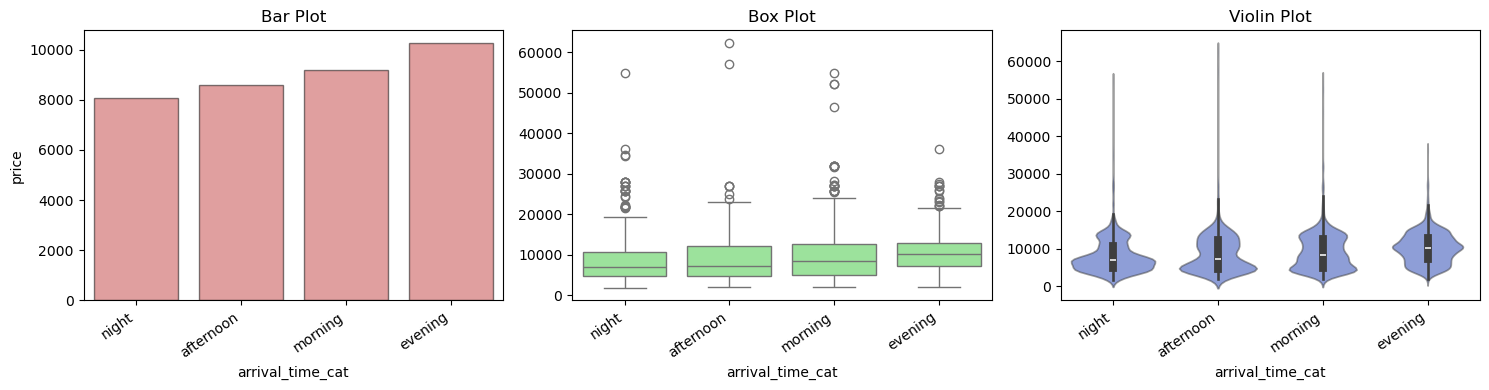

In [73]:
(
    train.assign(
        arrival_time_cat = lambda df_ : (
            np.select([df_.arrival_time.dt.hour.between(4,12, inclusive = "left"),
                      df_.arrival_time.dt.hour.between(12,16, inclusive = "left"),
                      df_.arrival_time.dt.hour.between(16,20, inclusive = "left"),
                      ],
                     ["morning", "afternoon", "evening"],
                     default = "night")
        )
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "arrival_time_cat")
    
)

### Source

In [74]:
train.source

0       Bangalore
1           Delhi
2       Bangalore
3         Kolkata
4       Bangalore
          ...    
6690        Delhi
6691      Kolkata
6692        Delhi
6693        Delhi
6694    Bangalore
Name: source, Length: 6695, dtype: object

In [75]:
train.source.describe()

count      6695
unique        5
top       Delhi
freq       2730
Name: source, dtype: object

In [76]:
train.source.value_counts()

Delhi        2730
Kolkata      1842
Bangalore    1435
Mumbai        448
Chennai       240
Name: source, dtype: int64

In [77]:
train.source.value_counts().sum()

6695

In [78]:
(train.source.value_counts()/train.source.value_counts().sum())*100

Delhi        40.776699
Kolkata      27.513069
Bangalore    21.433906
Mumbai        6.691561
Chennai       3.584765
Name: source, dtype: float64

In [79]:
(
    train
    .source
    .value_counts()
    .pipe(
        lambda ser : pd.concat([
            ser, 
           train.source.value_counts(normalize=True)*100
        ], axis = 1 )
    )
    .set_axis(["count", "percentage"], axis=1)
    
)

,count,percentage
Delhi,2730,40.776699
Kolkata,1842,27.513069
Bangalore,1435,21.433906
Mumbai,448,6.691561
Chennai,240,3.584765


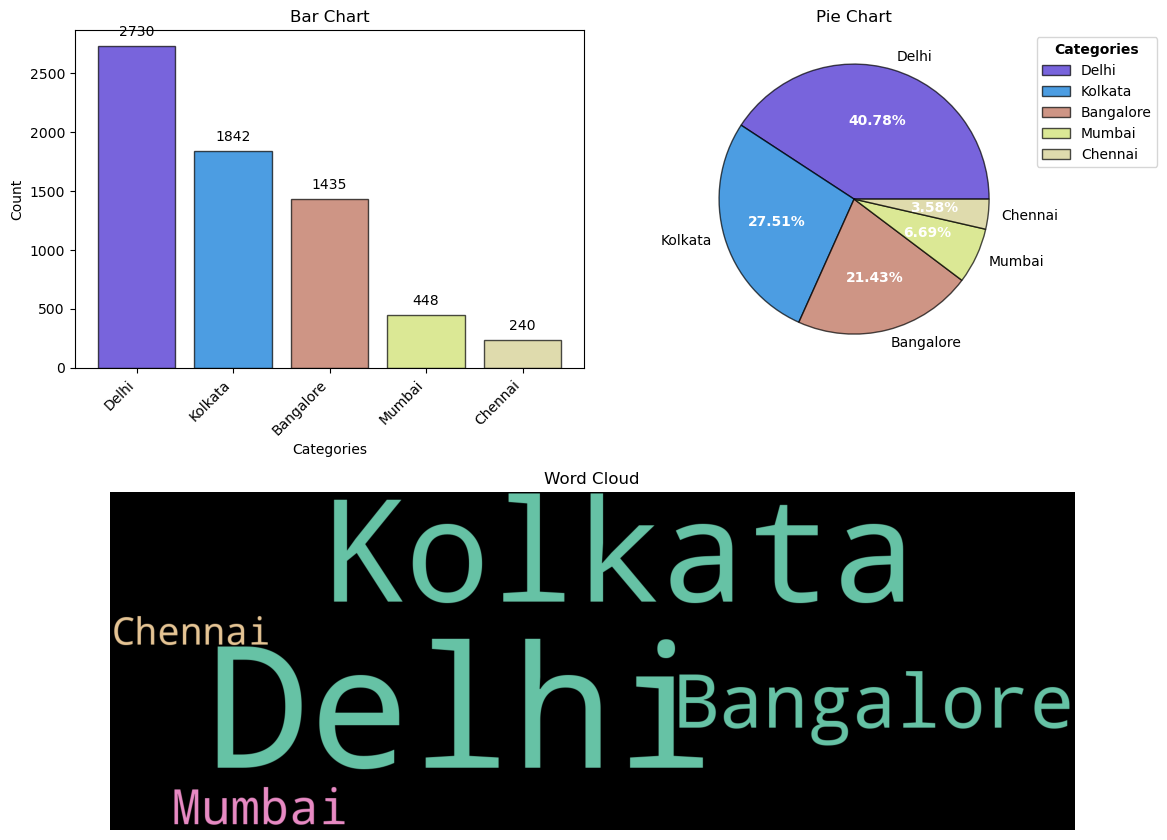

In [80]:
eda_helper_functions.cat_univar_plots(train, "source")

In [105]:
train.groupby(["source"]).agg("count")

,airline,date_of_journey,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
source,,,,,,,,,,
Bangalore,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435
Chennai,240,240,240,240,240,240,240,240,240,240
Delhi,2730,2730,2730,2729,2730,2730,2730,2729,2730,2730
Kolkata,1842,1842,1842,1842,1842,1842,1842,1842,1842,1842
Mumbai,448,448,448,448,448,448,448,448,448,448


<Axes: xlabel='source'>

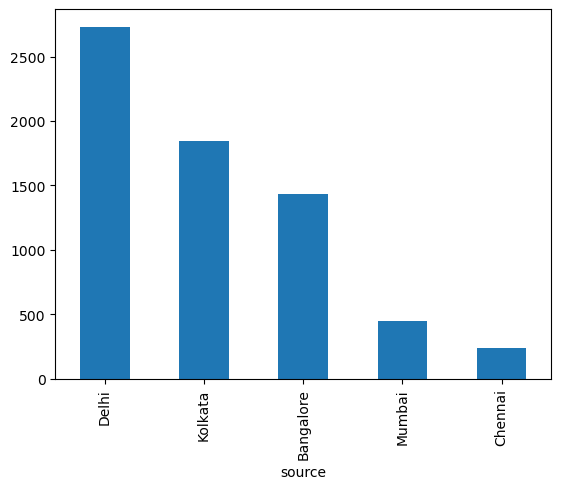

In [81]:
train.groupby(["source"]).agg("count")["price"].sort_values(ascending = False).plot(kind = "bar")

<Axes: xlabel='source'>

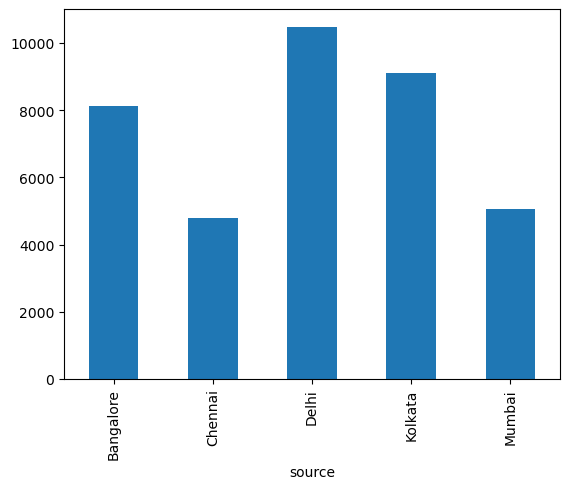

In [82]:
train.groupby(["source"])["price"].agg("mean").plot(kind = "bar")

In [83]:
train.source.unique()

array(['Bangalore', 'Delhi', 'Kolkata', 'Mumbai', 'Chennai'], dtype=object)

In [84]:
train.groupby("source").agg("mean",numeric_only=True)    
# //  .loc[:, "price"].sort_values()

,duration,total_stops,price
source,,,
Bangalore,378.609756,0.334495,8113.586063
Chennai,139.645833,0.000000,4791.141667
Delhi,804.391941,1.188714,10484.263736
Kolkata,748.678067,0.851792,9110.928339
Mumbai,199.408482,0.160714,5055.970982


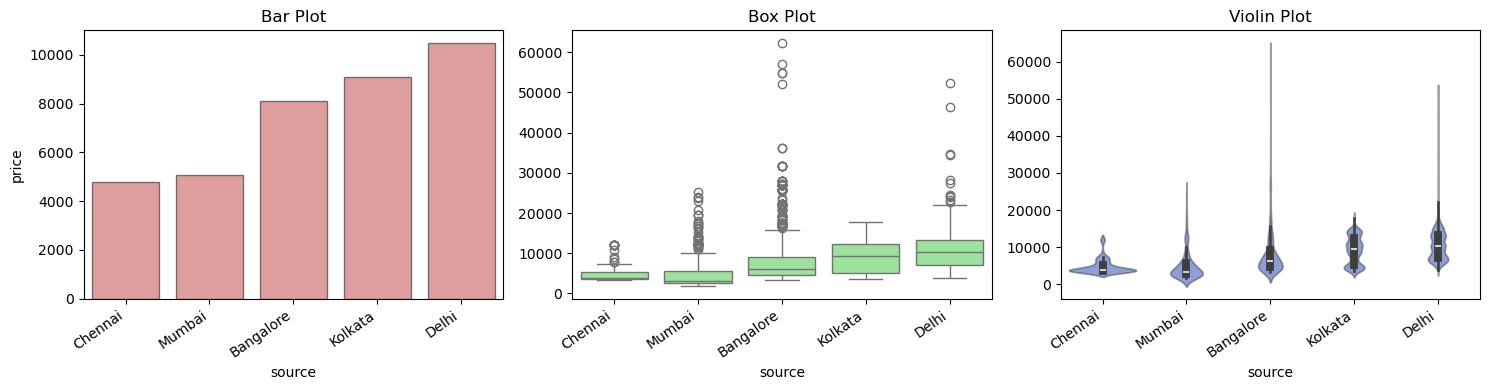

In [85]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="source"
)

### 8.5 duration

In [86]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

In [87]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865603804588318
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [88]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    510.0
0.75    922.5
Name: duration, dtype: float64

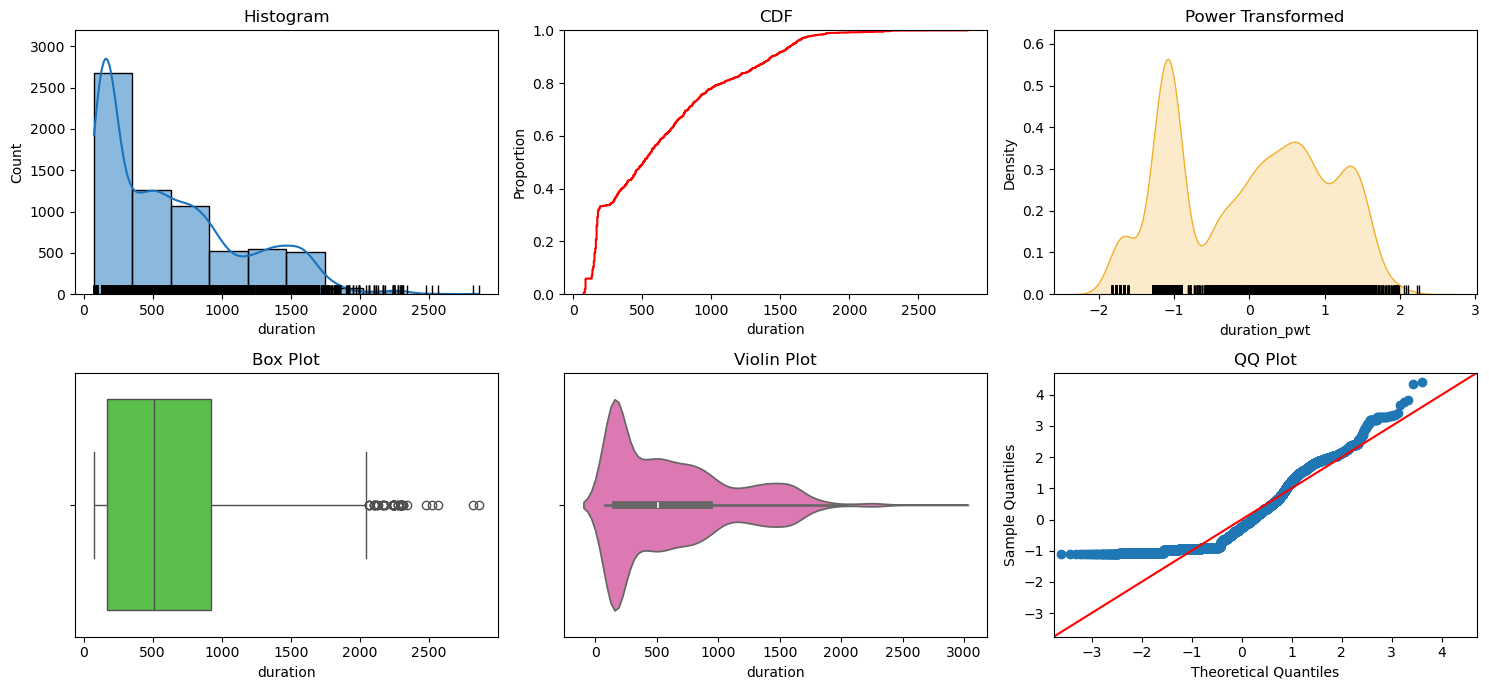

In [89]:
eda_helper_functions.num_univar_plots(train, "duration")

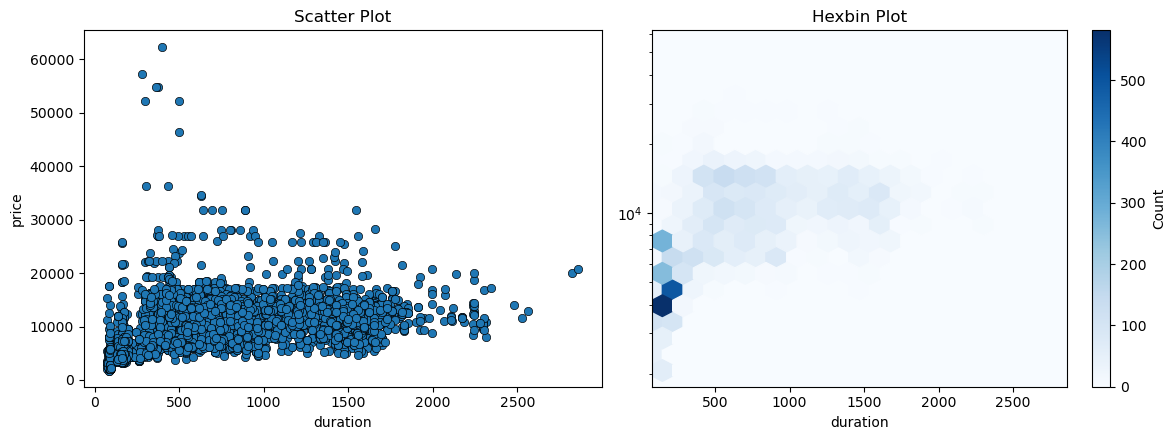

In [90]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [91]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5090124491779018
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


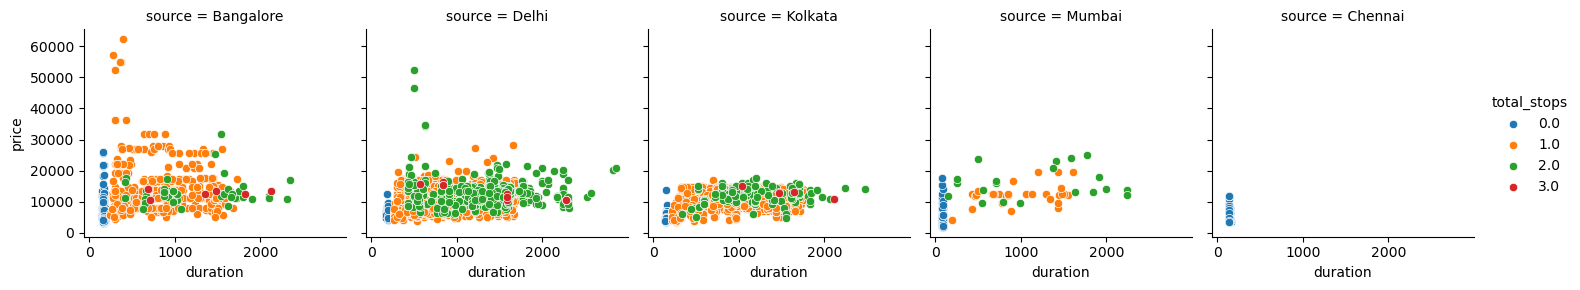

In [92]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

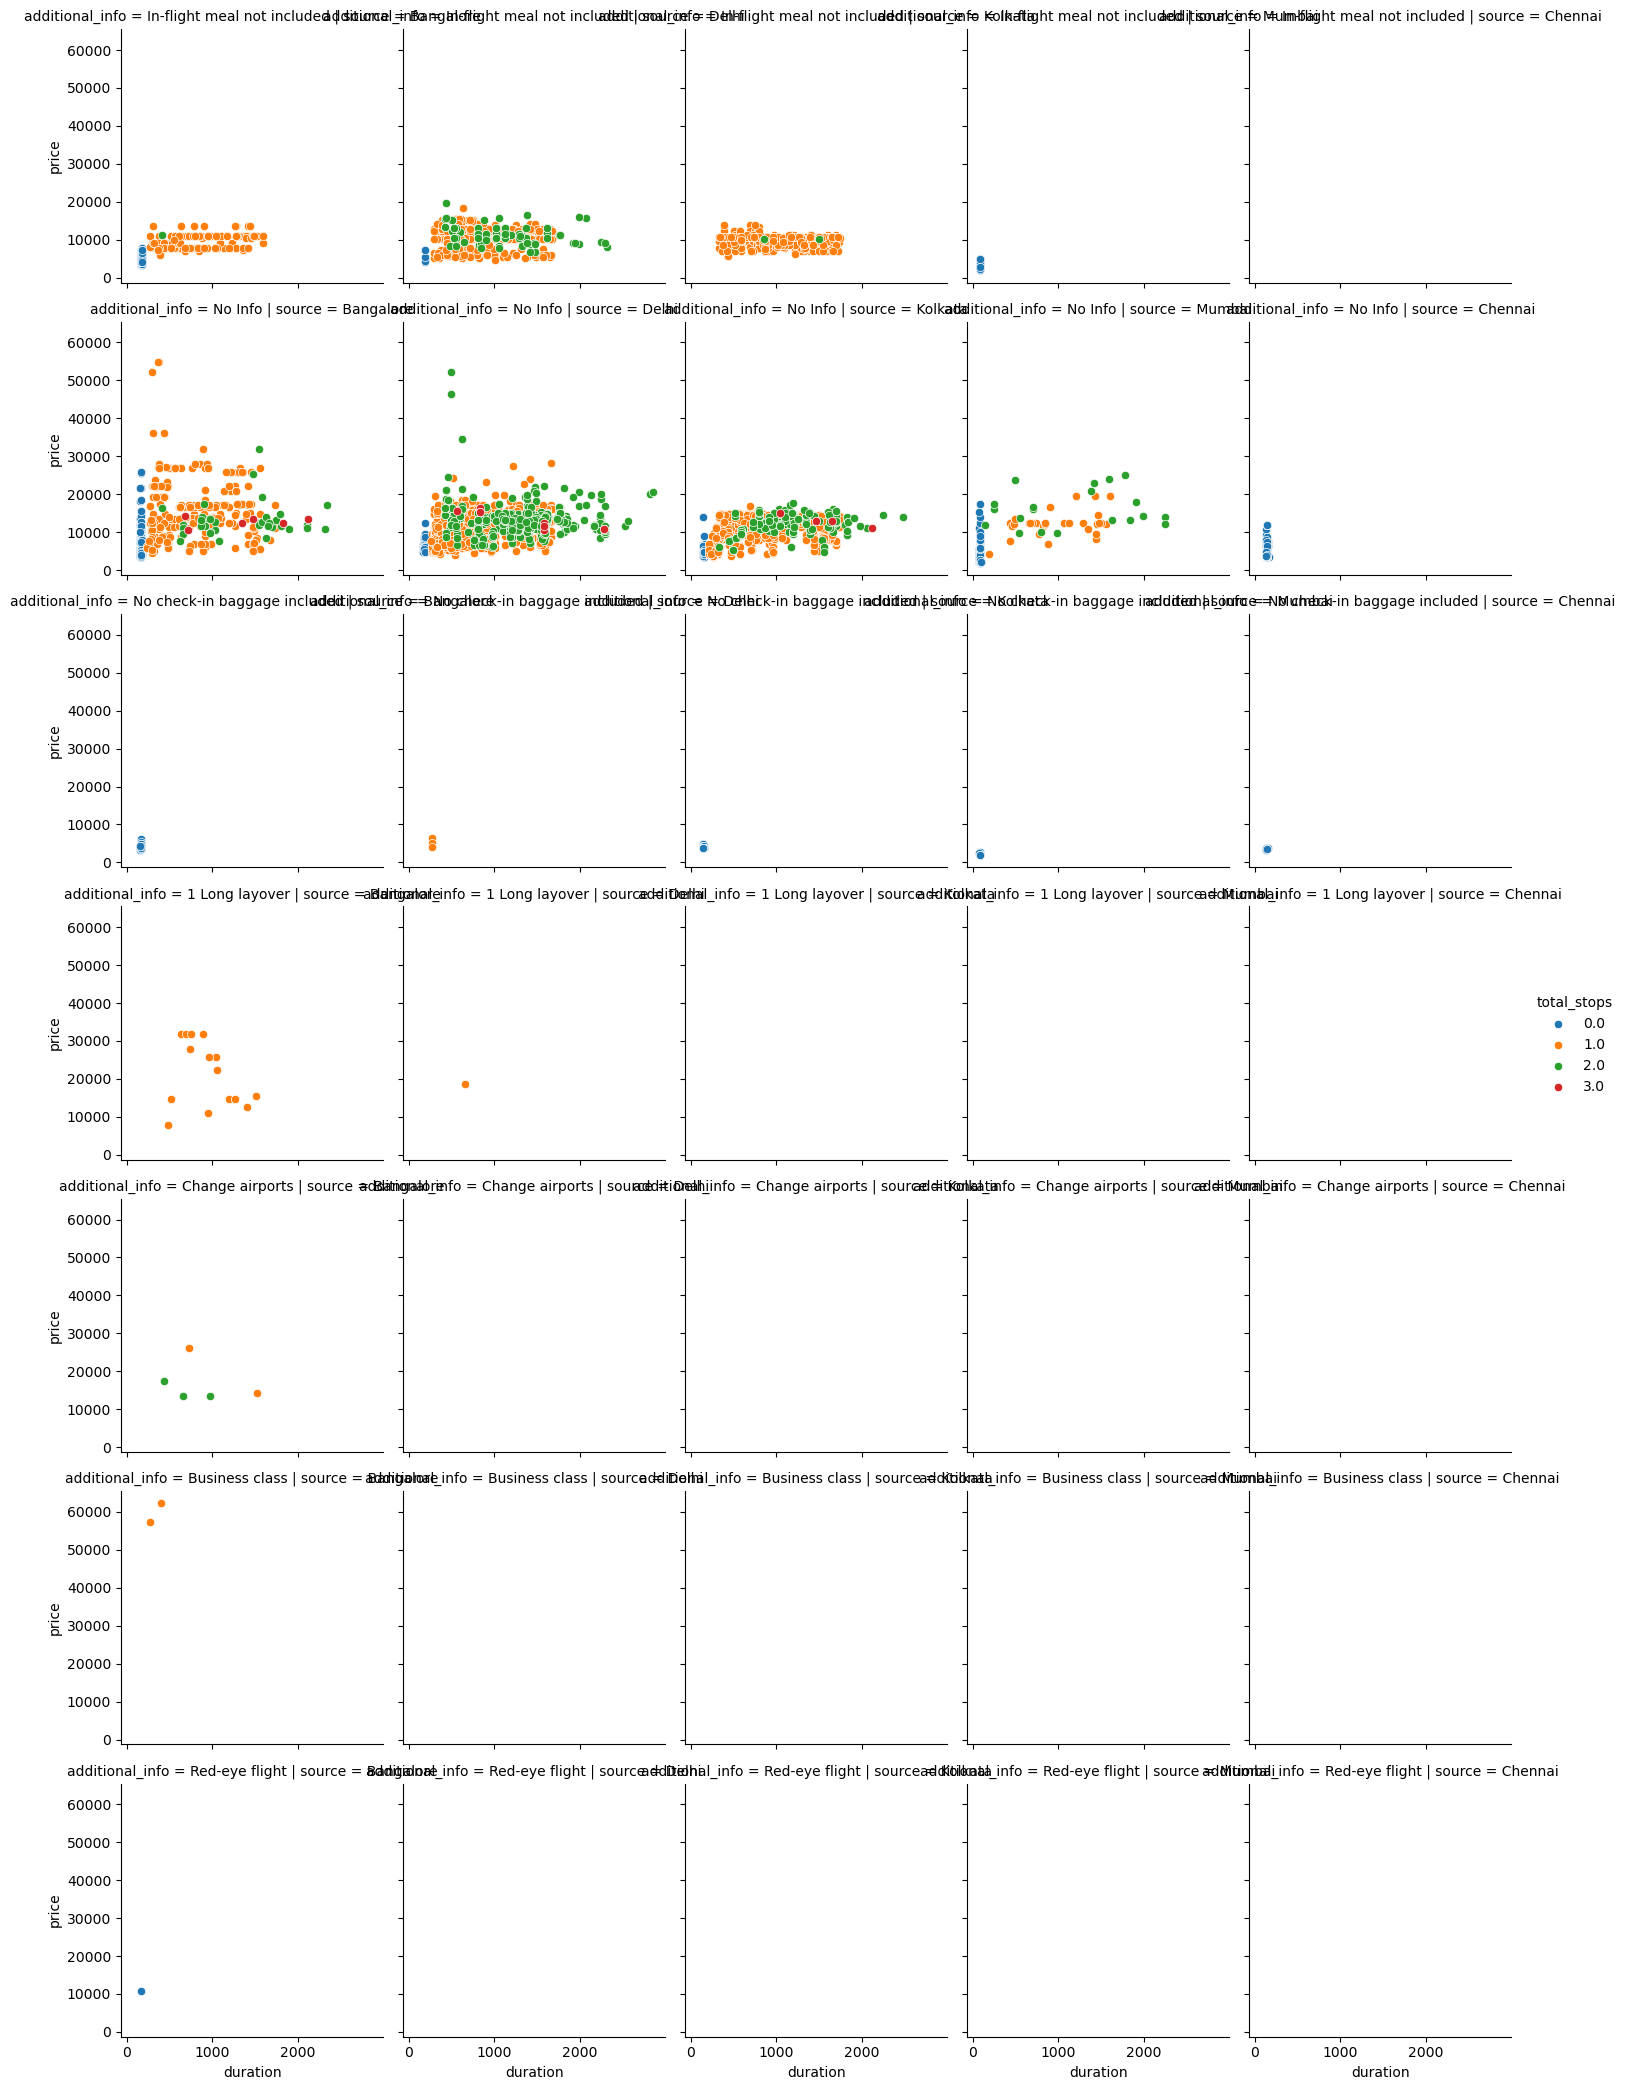

In [93]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [94]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -958.75
Upper Limit : 2051.25


,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → DEL → BLR,2025-09-08 05:50:00,2025-09-08 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochi,DEL → UDR → BOM → COK,2025-09-08 17:55:00,2025-09-08 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochi,DEL → UDR → BOM → COK,2025-09-08 17:55:00,2025-09-08 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Bangalore,New Delhi,BLR → CCU → GAU → DEL,2025-09-08 11:05:00,2025-09-08 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Bangalore,New Delhi,BLR → CCU → GAU → DEL,2025-09-08 11:05:00,2025-09-08 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Bangalore,New Delhi,BLR → CCU → GAU → DEL,2025-09-08 11:05:00,2025-09-08 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,2025-09-08 12:00:00,2025-09-08 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Bangalore,New Delhi,BLR → BOM → IDR → GWL → DEL,2025-09-08 06:45:00,2025-09-08 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochi,DEL → DED → BOM → COK,2025-09-08 16:50:00,2025-09-08 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochi,DEL → HYD → BOM → COK,2025-09-08 07:05:00,2025-09-08 19:15:00,2170,2.0,No Info,11552


### 8.5 additional_info

In [95]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,7
top,No Info
freq,5249


,count,percentage
category,,
No Info,5249,0.784018
In-flight meal not included,1215,0.181479
No check-in baggage included,207,0.030919
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


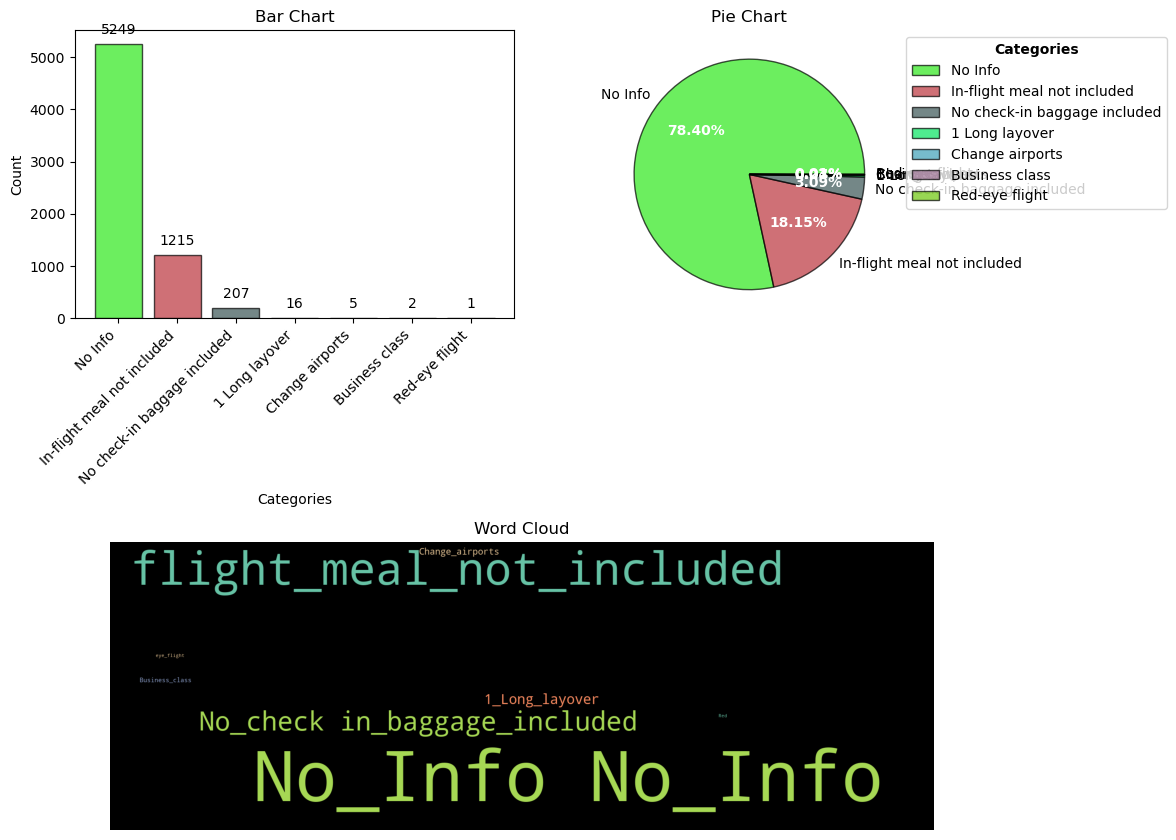

In [96]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

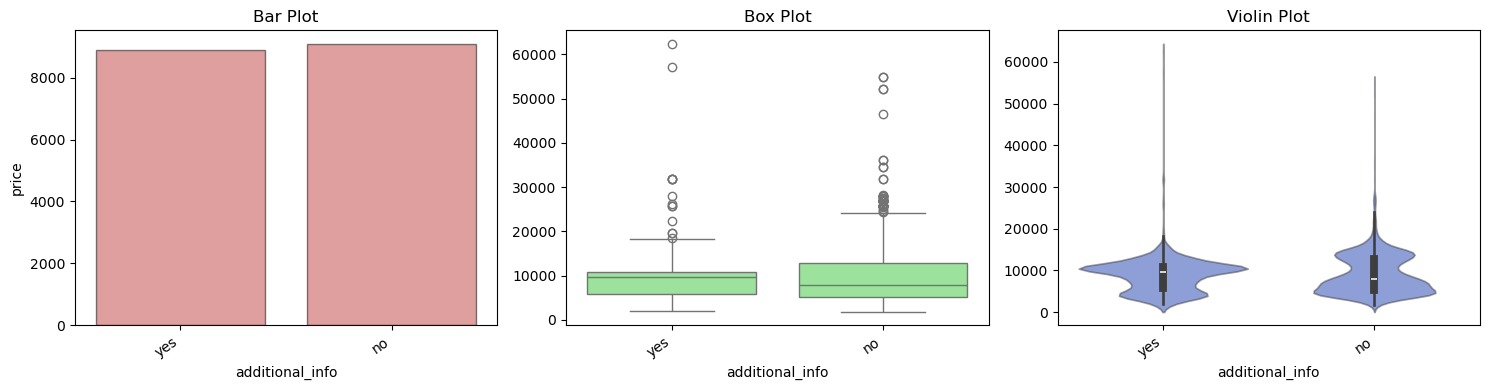

In [98]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)